In [12]:
import helper_functions
import numpy as np


import pickle

#Import keras from tensorflow and not as a standalone thing (that makes things work weird idk why)
from tensorflow import keras
# CNN
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Conv1D, Activation, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import InputLayer, Dropout, LSTM, BatchNormalization, Flatten, ZeroPadding1D, AveragePooling2D, BatchNormalization, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D

#import helper_functions
from tensorflow.keras.layers import GlobalMaxPooling1D, Dropout, BatchNormalization



In [13]:
#data_path = 'data' 
AlexPath = "data/processed/data"
with open(AlexPath, 'rb') as f:
    data = pickle.Unpickler(f).load()

In [14]:
# Shuffle the data
dataToShuffle = []

for log, mfcc, label in zip(data['log-mel'],data['mfccs'],data['classes']):
    dataToShuffle.append([log,mfcc,label])

ShuffledData = np.array(dataToShuffle)
np.random.shuffle(ShuffledData)

<ipython-input-14-9fd0e306c2b1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ShuffledData = np.array(dataToShuffle)


In [15]:
# Separate the data into training and test datasets
Train = ShuffledData[:45305]
Test = ShuffledData[45305:]

log_train = []
mfcc_train = []
y_train = []

log_test = []
mfcc_test = []
y_test = []

for log, mfcc, label in Train:
    log_train.append(log)
    mfcc_train.append(mfcc)
    y_train.append(label)
    
for log, mfcc, label in Test:
    log_test.append(log)
    mfcc_test.append(mfcc)
    y_test.append(label)


NameError: name 'x_train' is not defined

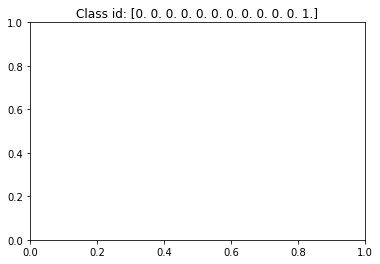

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(2):
    label = y_train[45000+i]
    plt.figure()
    plt.title("Class id: "+ str(label))
    plt.imshow(x_train[45000+i])

In [56]:
log_test[0].shape


(15, 173)

In [16]:
InputShape = log_test[0].shape
output_dim = y_test[0].shape[0]

dropout = 0.2

#based on model 1 from https://www.researchgate.net/publication/348432098_Speech_recognition_based_on_Convolutional_neural_networks_and_MFCC_algorithm
# Creation of the CNN
model = Sequential()
model.add(InputLayer(input_shape=InputShape))
model.add(ZeroPadding1D(padding=2))
model.add(Conv1D(filters=256, kernel_size=10))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Conv1D(filters=256, kernel_size=5))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dense(output_dim))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
#based on https://towardsdatascience.com/tensorflow-speech-recognition-challenge-solution-outline-9c42dbd219c9
#this one could be quite good, ^^ was getting like 80-85% accuracy (It's the 1D CNN)
model = Sequential()

model.add(BatchNormalization())

model.add(Conv1D(64,kernel_size=2,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64,kernel_size=2,padding='same'))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(MaxPooling1D(2))

model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(MaxPooling1D(2))

model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(MaxPooling1D(2))

model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 3,padding='same'))
model.add(Activation('relu'))


model.add(Dropout(0.2))
model.add(MaxPooling1D(2))

model.add(GlobalMaxPooling1D())

model.add(Dense(12, activation="softmax"))
    

In [19]:


# https://keras.io/api/optimizers/#:~:text=An%20optimizer%20is%20one%20of%20the%20two%20arguments,default%20parameters%20for%20the%20optimizer%20will%20be%20used.
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [20]:
#Train the model 
x_train = np.array(mfcc_train)
y_train = np.array(y_train)
model.fit(x=x_train, y=y_train, epochs=12, batch_size=128)

Epoch 1/12


ValueError: in user code:

    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\layers\pooling.py:71 call
        outputs = self.pool_function(
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5740 pool2d
        x = nn.max_pool(
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\nn_ops.py:4653 max_pool
        return gen_nn_ops.max_pool(
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\gen_nn_ops.py:5340 max_pool
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\ops.py:3557 _create_op_internal
        ret = Operation(
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_2/max_pooling1d_7/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](sequential_2/max_pooling1d_7/ExpandDims)' with input shapes: [?,1,1,128].


In [ ]:
#anontherone from https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
#Compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam(), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#Train The Model
x_train = np.array(mfcc_train)
y_train = np.array(y_train)
model.fit(x_train, y_train, batch_size=4, epochs=10, verbose=1, validation_data=(x_test, y_test))

In [ ]:
# Testing the model 
x_test = np.array(mfcc_test)
y_test = np.array(y_test)
score = model.evaluate(x_test,y_test)